FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Research\\GlobalQ\\global_Q_code\\data\\fdi_bug_removed.csv'

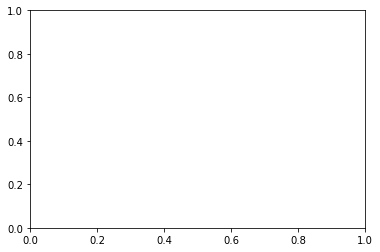

In [1]:
#including snowmelt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit   
from scipy import stats
from matplotlib.ticker import FormatStrFormatter
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import uncertainties as unc
from uncertainties import unumpy as unp

#####change to your working directory
wd = 'C:\Research\GlobalQ\global_Q_code'

#cls = ['blue','green','red']
cls = ['#0571b0','#a6611a','#4d857c']
cls = ['#06592A','#0D4A70','#CF597E']
cls = ['#06592A','#0D4A70','#6E005F']
fig, ax1 = plt.subplots()

lw = 1.2
fitlw = 0.9
alpha = 0.15
ylim1 = [1.98,2.12]
ylim2 = [7.052,7.079]
ylim3 = [7.107,7.138]
#statistics based on trend analysis in R
slp1 = [8.5,2.9,-4]
slp2= [2.8,0.28,-4]
slp3= [2.6,0.46,-4]  #[-2.2,0.88,-5]  #-0.000019

fdi = pd.read_csv(r'{}\data\fdi_bug_removed.csv'.format(wd))
pdi = pd.read_csv(r'{}\data\pdi.csv'.format(wd))
smdi = pd.read_csv(r'{}\data\smdi.csv'.format(wd))

years = fdi['year']  #[2018,2019,2020,2021]
fdi = fdi['fdi'] #[1,2,1,2]
pdi = pdi['pdi'] #[10,15,17,11]
smdi = smdi['smdi']
#print(sm.OLS(years,fdi).fit().summary())
#print(sm.OLS(years,pdi).fit().summary())
#print(sm.OLS(years,etdi).fit().summary())

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, years, fdi)
# calculate parameter confidence interval
a1,b1 = unc.correlated_values(popt, pcov)
# calculate regression confidence interval
px = np.linspace(1984, 2018, 35)
py = a1*px+b1
nom1 = unp.nominal_values(py)
std1 = unp.std_devs(py)

popt, pcov = curve_fit(f, years, pdi)
# calculate parameter confidence interval
a2,b2 = unc.correlated_values(popt, pcov)
# calculate regression confidence interval
py = a2*px+b2
nom2 = unp.nominal_values(py)
std2 = unp.std_devs(py)

popt, pcov = curve_fit(f, years, smdi)
# calculate parameter confidence interval
a3,b3 = unc.correlated_values(popt, pcov)
# calculate regression confidence interval
py = a3*px+b3
nom3 = unp.nominal_values(py)
std3 = unp.std_devs(py)


ax1.plot(years,fdi,color=cls[0],label='HDI  ',linewidth=lw)

ax2 = ax1.twinx()
ax2.plot(years,pdi,color=cls[1],label='PDI  ',linewidth=lw)

ax3 = ax1.twinx()
ax3.plot(years,smdi,color=cls[2],label='SMDI',linewidth=lw)
#ax3.spines['right'].set_position(('outward',60))
ax3.spines['right'].set_position(('axes',1.15))



ax1.set_ylabel("Hydrologic Distribution Index (HDI)",color=cls[0])
ax2.set_ylabel("Precipitation Distribution Index (PDI)",color=cls[1])
ax3.set_ylabel("Snowmelt Distribution Index (SMDI)",color=cls[2])

ax1.tick_params(axis='y',colors=cls[0])
ax2.tick_params(axis='y',colors=cls[1])
ax3.tick_params(axis='y',colors=cls[2])

ax2.spines['right'].set_color(cls[1])
ax3.spines['right'].set_color(cls[2])
ax3.spines['left'].set_color(cls[0])
ax3.spines['top'].set_color('gray')

# plot the regression
ax1.plot(years, nom1, c=cls[0], linestyle='dashed',
         linewidth=fitlw,label='HDI trend (slope = ${{({} \pm {})×10}}^{{{}}})$***'.format(slp1[0],slp1[1],slp1[2]))
ax2.plot(years, nom2, c=cls[1], linestyle='dashed',linewidth=fitlw,
         label='PDI trend (slope = ${{({} \pm {})×10}}^{{{}}})$***'.format(slp2[0],slp2[1],slp2[2]))
ax3.plot(years, nom3, c=cls[2], linestyle='dashed',linewidth=fitlw,
         label=("SMDI trend (slope = ${{({} \pm {})×10}}^{{{}}})$***").format(slp3[0],slp3[1],slp3[2]))

# uncertainty lines (95% confidence)
y1 = nom1 - 1.96 * std1
y2 = nom1 + 1.96 * std1
ax1.fill_between(px, y1, y2, color=cls[0], alpha=alpha)

y1 = nom2 - 1.96 * std2
y2 = nom2 + 1.96 * std2
ax2.fill_between(px, y1, y2, color=cls[1], alpha=alpha)

y1 = nom3 - 1.96 * std3
y2 = nom3 + 1.96 * std3
ax3.fill_between(px, y1, y2, color=cls[2], alpha=alpha)

ax1.legend(loc=(0.03,0.248),ncol=2,labelcolor='linecolor')
ax2.legend(loc=(0.03,0.13),ncol=2,labelcolor='linecolor')
ax3.legend(loc=(0.03,0.01),ncol=2,labelcolor='linecolor')

ax1.axis(ymin = ylim1[0],ymax = ylim1[1],xmin=1982,xmax=2020)
ax2.axis(ymin = ylim2[0],ymax = ylim2[1])
ax3.axis(ymin = ylim3[0],ymax = ylim3[1])

ax2.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))
ax3.yaxis.set_major_formatter(FormatStrFormatter('%.3f'))

ax2.set_yticks(np.arange(ylim2[0],ylim2[1],0.005))
ax3.set_yticks(np.arange(ylim3[0],ylim3[1],0.005))

plt.show()
fig.savefig(os.path.join(wd, 'graph/Figure2B'),bbox_inches='tight')